## Data exploration

In der project description steht:


You project MUST contain the following elements:

descriptive statistics about the datasets

graphical representations


"Data exploration
Now that you have cleaned data, explore your data to understand its

structure. Perform basic exploratory data analysis.

Look at the distribution of the overall data, specific samples or

features.

Visualize the data distribution

Visualize the inter-dependencies (e.g. correlations) among specific samples/features of

interest

Check some of your hypothesis like - is something high/low between

two conditions etc"

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [19]:
df = pd.read_csv("../generated/data cleanup/ab_ag_filtered.tsv", sep = '\t')

df.head(3).T

,0,1,2
pdb,8veb,8ved,8vee
Hchain,G,H,H
Lchain,I,L,L
model,0,0,0
antigen_chain,E,A,A
antigen_type,protein,protein,protein
antigen_name,hemagglutinin,hemagglutinin,hemagglutinin
compound,Cryo-EM structure of antibody T5-1E08 in compl...,Cryo-EM structure of antibody T5-1E11 in compl...,Cryo-EM structure of antibody T5-1E08 in compl...
organism,Homo sapiens; Influenza A virus,Homo sapiens; Influenza A virus,Homo sapiens; Influenza A virus
heavy_species,homo sapiens,homo sapiens,homo sapiens


Now do visualization. Plots should be able to stand for themselves, i.e. title

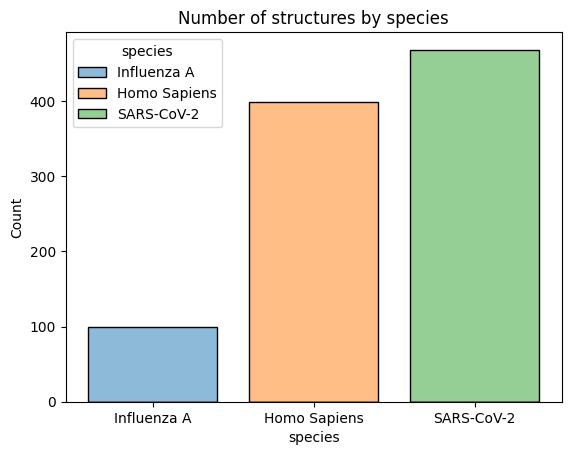

In [20]:
sns.histplot(df, x = 'species', hue = 'species', shrink = 0.8)
plt.title("Number of structures by species")
plt.show()

Always describe what you see. I.e. Majority of structures are Sars and human, only small subset Influenza

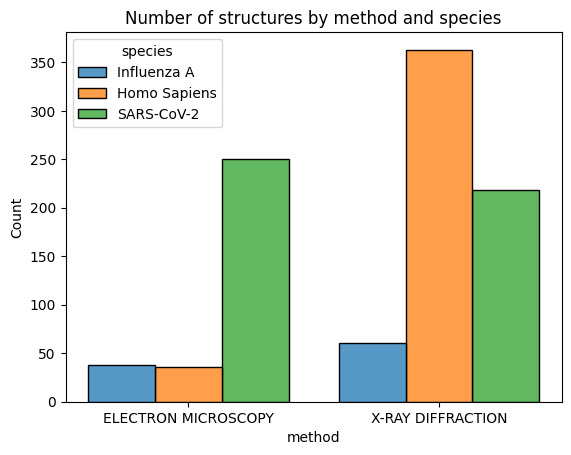

In [21]:
sns.histplot(df, x = 'method', hue = 'species', multiple = 'dodge', shrink = 0.8)
plt.title("Number of structures by method and species")
plt.show()

Clear association / dependency between method and species. 

When we see such a correlation (or not), we do a statistical test!

In [22]:
tbl = pd.crosstab(df.species, df.method)
tbl

method,ELECTRON MICROSCOPY,X-RAY DIFFRACTION
species,,
Homo Sapiens,36,363
Influenza A,38,61
SARS-CoV-2,250,218


In [23]:
chi2_stat, p, dof, expected = chi2_contingency(tbl.to_numpy())
p

np.float64(2.4752550459968912e-42)

So there is a significant association between method and species (p = 2.5e-42).

So if we observe difference between Human and Sars, need to check if this is really due to species or due to method (as humans are mainly X-ray, while Sars both EM and xray)

Now go through all columns and look what's in there. Always write a sentence. Some are trivial, others not. 

Make plots for visualization.

Point out if something needs to be taken into account in analysis later, like method above!

Example: resolution

Bimodal distribution. Can do boxplot, but that does not clearly show bimodality.
Histogram or violinplot do (so prefer violinplot and histogram to boxplot in exploratory analysis, as it shows more).

**Note**: SabDab seems to be using resolution = 0.0 when resolution is not known. This is important to mention and discuss. So maybe we should remove it after all? 

If we remove it, we could do a t-test between EM and X-ray resolution. X-ray seems to have better resolution if we exclude 0.

<Axes: xlabel='method', ylabel='resolution'>

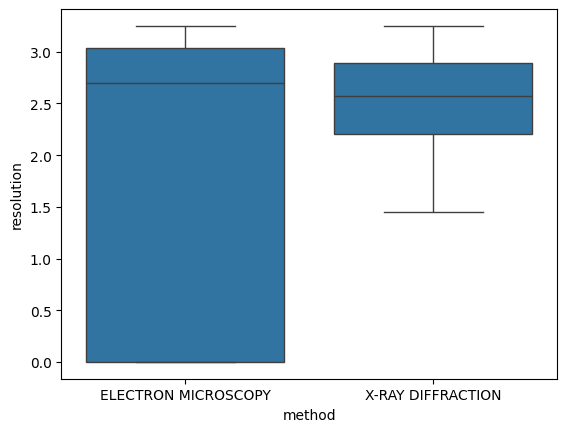

In [38]:
sns.boxplot(x = 'method', y = 'resolution', data = df)

<Axes: xlabel='resolution', ylabel='Count'>

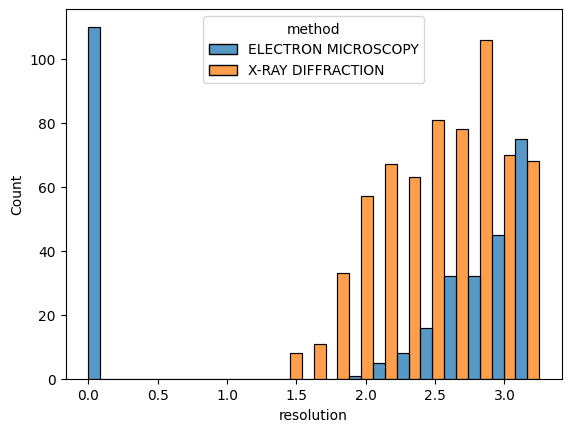

In [35]:
sns.histplot(df, x = 'resolution', hue = 'method', multiple = 'dodge')

<Axes: xlabel='method', ylabel='resolution'>

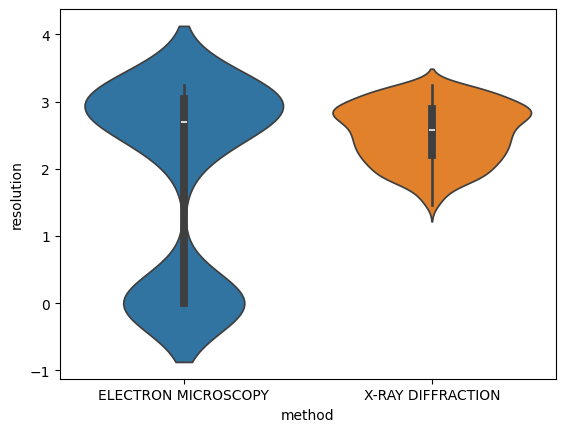

In [43]:
# here x and hue are the same. simply nicer to use color as well

sns.violinplot(x = 'method', y = 'resolution', hue = 'method', data = df)

For others we see there is always same value. Could remove those

In [24]:
df.model.value_counts()

model
0    966
Name: count, dtype: int64

In [39]:
df.engineered.value_counts()

engineered
True     949
False     17
Name: count, dtype: int64

In [44]:
df.antigen_type.value_counts() # all the same by design

antigen_type
protein    966
Name: count, dtype: int64

In [29]:
df.antigen_name.value_counts()

antigen_name
spike glycoprotein                                                201
spike protein s1                                                  198
hemagglutinin                                                      49
surface glycoprotein                                               26
neuraminidase                                                      25
                                                                 ... 
spike protein s2                                                    1
9mer peptide,beta-2-microglobulin,mhc class i antigenchimera        1
sars-cov-2 rbd                                                      1
receptor tyrosine-protein kinase erbb-2/higg1 fc domainfusion       1
interleukin-22                                                      1
Name: count, Length: 243, dtype: int64

In [30]:
df.organism.value_counts()

organism
HOMO SAPIENS                                                                                                   262
Homo sapiens; Severe acute respiratory syndrome coronavirus 2                                                  244
SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS 2; HOMO SAPIENS                                                  123
Homo sapiens                                                                                                   108
HOMO SAPIENS; SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS 2                                                   90
Homo sapiens; Influenza A virus                                                                                 29
INFLUENZA A VIRUS; HOMO SAPIENS                                                                                 17
HOMO SAPIENS; SYNTHETIC CONSTRUCT                                                                               16
HOMO SAPIENS; INFLUENZA A VIRUS                                        